![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


  # **Cortex Game: Round2--Probability of Giving**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [1]:
my_folder = "/content/drive/MyDrive/cortex"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/cortex


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [2]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [3]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [4]:
pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 4.6 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=f9176f97bba3465fafeecbf6979a5d7d69d9a341fb03a28b8fd5180dfc0a366d
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [5]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [6]:
#%%writefile .authinfo
#oda user USR password PSW

Copy this file to home

In [7]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [8]:
import saspy
sas_session = saspy.SASsession(cfgfile=os.path.join(
    my_folder,"sascfg_personal.py"))
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 352



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/cortex/sascfg_personal.py
WORK Path             = /saswork/SAS_workA4FF0001D006_odaws01-usw2-2.oda.sas.com/SAS_work08C80001D006_odaws01-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 118790


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [9]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                    Saturday, December  3, 2022 05:01:00 AM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                    Saturday, December  3, 2022 05:01:00 AM

33         


For local Jupyter

### Transform cloud SAS dataset to Python dataframe (pandas)

For reference: 

1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)


2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [10]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

## Merge the Data

In [11]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
571984,2571985.0,HICKEY,LYDIA,1.0,51.0,21300.0,University / College,City,10.0,1.0,...,2.0,10.0,30.0,10.0,20.0,0.0,0.0,0.0,0.0,0.0
5621,2005622.0,GARZA,ANTHONY,0.0,32.0,66800.0,University / College,Rural,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,20.0,0.0,0.0,0.0


## Exploration

In [12]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       336334 non-null   float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

In [13]:
data_merge.describe()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000
mean,2.500000e+06,0.516936,46.366170,65531.654000,4.582967,0.561413,0.560556,3.039636,1.666882,4.474148,104.454055,43.130251,85.897932,0.122101,7.673015,0.1,0.149457,9.409665
std,2.886753e+05,0.499713,18.945324,61051.122343,3.325844,0.996803,1.054027,2.120722,1.052090,2.588119,303.760477,150.249476,283.581066,0.327403,82.224854,0.3,0.356539,90.917731
min,2.000001e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.250001e+06,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.000000,15.000000,20.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,2.500000e+06,1.000000,46.000000,44000.000000,4.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.000000,20.000000,30.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,2.750000e+06,1.000000,61.000000,91200.000000,7.000000,1.000000,1.000000,4.000000,2.000000,6.000000,90.000000,30.000000,75.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,3.000000e+06,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000,10000.000000,1.0,1.000000,10000.000000


## Preprocessing

In [14]:
import numpy as np
def deal_with_nulls(data, otro):
  if not otro:
    #Recency
    data.loc[(data['GaveLastYear'] == 1.0), 'Recency'] = 1
    data.loc[np.isnan(data['Recency']) & (data['GaveLastYear'] == 0.0), 'Recency'] = 12
    data.loc[np.isnan(data['Recency']) & (data['GaveLastYear'] == 1.0), 'Recency'] = 1

    #Frequency
    data.loc[(data['GaveLastYear'] == 1.0), 'Frequency'] += 1
    data.loc[np.isnan(data['Frequency']) & (data['GaveLastYear'] == 0.0), 'Frequency'] = 0
    data.loc[np.isnan(data['Frequency']) & (data['GaveLastYear'] == 1.0), 'Frequency'] = 1

    #Seniority
    data['Seniority'].fillna(12, inplace = True)

    #TotalGift
    data.loc[(data['GaveLastYear'] == 1.0), 'TotalGift'] += data["AmtLastYear"]
    data.loc[np.isnan(data['TotalGift']) & (data['GaveLastYear'] == 0.0), 'TotalGift'] = 0 
    data.loc[np.isnan(data['TotalGift']) & (data['GaveLastYear'] == 1.0), 'TotalGift'] = data["AmtLastYear"]
    

    #MinGift
    data.loc[data['GaveLastYear'] == 1 & (data['AmtLastYear'] < data['MinGift']), 'MinGift'] = data['AmtLastYear']
    data.loc[np.isnan(data['MinGift']) & (data['GaveLastYear'] == 0.0), 'MinGift'] = 0 
    data.loc[np.isnan(data['MinGift']) & (data['GaveLastYear'] == 1.0), 'MinGift'] = data["AmtLastYear"]

    #MaxGift
    data.loc[data['GaveLastYear'] == 1 & (data['AmtLastYear'] > data['MaxGift']), 'MaxGift'] = data["AmtLastYear"]
    data.loc[np.isnan(data['MaxGift']) & (data['GaveLastYear'] == 0.0), 'MaxGift'] = 0 
    data.loc[np.isnan(data['MaxGift']) & (data['GaveLastYear'] == 1.0), 'MaxGift'] = data["AmtLastYear"]
  else:
    data[['MinGift']] = data[['MinGift']].fillna(value=0)
    data[['Recency']] = data[['Recency']].fillna(value=0)
    data[['Frequency']] = data[['Frequency']].fillna(value=0)
    data[['Seniority']] = data[['Seniority']].fillna(value=0)
    data[['TotalGift']] = data[['TotalGift']].fillna(value=0)
    data[['MaxGift']] = data[['MaxGift']].fillna(value=0)

  return data

In [15]:
def one_hot_encoding(data, columns):
  encoded_data = pd.get_dummies(data, columns = columns)
  
  return encoded_data

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scalate(data, to_scale):
  #scaler = StandardScaler()
  scaler = MinMaxScaler()
  scaler.fit(data[to_scale])
  transformed = scaler.transform(data[to_scale])
  data[to_scale] = pd.DataFrame(transformed, columns = data[to_scale].columns)

  return data


In [17]:
numeric = ['Age', 'Salary', 'NbActivities','TotalGift', 'AmtLastYear', 'Referrals', 'Recency', 'Frequency', 'Seniority', 'MinGift', 'MaxGift']
cat = ['Woman','SeniorList', 'GaveLastYear']

In [18]:
prepro_data = deal_with_nulls(data_merge, True)
prepro_data = one_hot_encoding(prepro_data, ['Education', 'City'])
prepro_data = scalate(prepro_data, numeric)

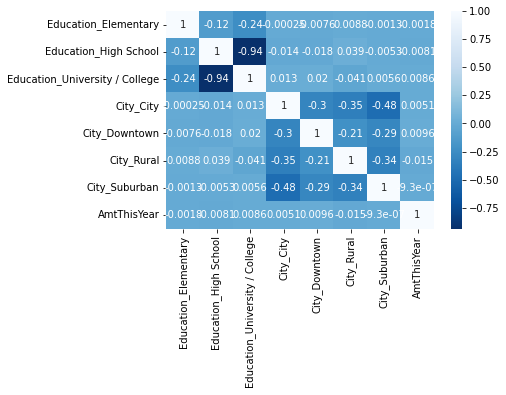

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

dummies_name = ['Education_Elementary', 'Education_High School', 'Education_University / College', 'City_City', 'City_Downtown', 'City_Rural', 'City_Suburban']
corr_dummies = prepro_data[dummies_name+['AmtThisYear']].corr()
sns.heatmap(corr_dummies, annot=True, cmap="Blues_r")
plt.show()

In [20]:
prepro_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   ID                              1000000 non-null  float64
 1   LastName                        999977 non-null   object 
 2   FirstName                       999996 non-null   object 
 3   Woman                           1000000 non-null  float64
 4   Age                             1000000 non-null  float64
 5   Salary                          1000000 non-null  float64
 6   SeniorList                      1000000 non-null  float64
 7   NbActivities                    1000000 non-null  float64
 8   Referrals                       1000000 non-null  float64
 9   Recency                         1000000 non-null  float64
 10  Frequency                       1000000 non-null  float64
 11  Seniority                       1000000 non-null  float64
 12  T

## Data Partition

In [21]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(prepro_data, test_size=0.1, random_state=123) 

#train.head()
train.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,...,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
657222,2657223.0,MCGILL,DONALD,0.0,0.216216,0.8456,7.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0,0,1,1,0,0,0
839381,2839382.0,ETZEL,ROSE,1.0,0.675676,0.1576,4.0,0.0,0.0625,0.1,...,0.0,0.0,0.0,0,1,0,0,1,0,0


# Prebuilt Models

The sk-learn library offers more advanced models. 

sk-learn library: https://scikit-learn.org/stable/index.html  

## Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
chosen = ['Age', 'Salary','MinGift', 'GaveLastYear','Woman', 'AmtLastYear', 'NbActivities', 'Frequency', 'Contact'] + dummies_name
#chosen = ['Age', 'Salary','MinGift', 'GaveLastYear','Woman', 'AmtLastYear', 'NbActivities', 'Frequency', 'Contact', 'MinGift', 'TotalGift'] + dummies_name
#comment: it's numpy array ==> categorical variables
X_train = train[chosen] 
Y_train = train['GaveThisYear']
X_valid = validation[chosen] 
Y_valid = validation['GaveThisYear']

regr = LogisticRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [23]:
#you can change the criteria

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_valid, regr_predict)
print(confusion_matrix)

[[84073   861]
 [14112   954]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, regr_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     84934
         1.0       0.53      0.06      0.11     15066

    accuracy                           0.85    100000
   macro avg       0.69      0.53      0.52    100000
weighted avg       0.81      0.85      0.80    100000



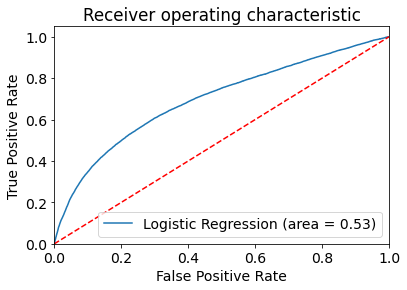

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

logit_roc_auc = roc_auc_score(Y_valid, regr.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, regr.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Decision Tree Model

In [26]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(max_depth=7,criterion="entropy", min_samples_split=2, random_state=42).fit(X_train,Y_train)
DT_predict_proba = DT_model.predict_proba(X_valid) #Predictions on Testing data
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data
# Probabilities for each class
DT_probs = DT_model.predict_proba(X_valid)[:, 1]
print(DT_probs)

[0.23340977 0.14074317 0.17293761 ... 0.10273259 0.19898897 0.35909683]


In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_valid, DT_predict)
print(confusion_matrix)

[[84034   900]
 [13386  1680]]


In [28]:
DT_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, DT_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     84934
         1.0       0.65      0.11      0.19     15066

    accuracy                           0.86    100000
   macro avg       0.76      0.55      0.56    100000
weighted avg       0.83      0.86      0.81    100000



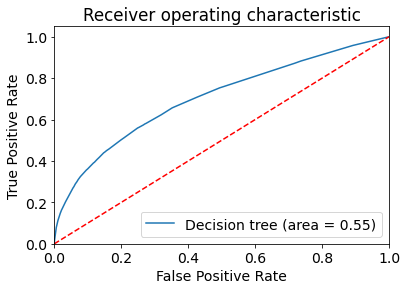

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

DT_roc_auc = roc_auc_score(Y_valid, DT_model.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, DT_model.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

In [31]:
parameters_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [3,5,7,10],
    "min_samples_split": [2, 3, 4]}

In [32]:
from sklearn.model_selection import GridSearchCV
DT_modelGS = DecisionTreeClassifier(random_state=42)

DT2_model = GridSearchCV(DT_modelGS, parameters_grid, cv=3)

# Fit
DT2_model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFaile

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 3, 4]})

In [33]:
DT2_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

## Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(max_depth=5, random_state=123)
RF_model.fit(X_train, Y_train)

RF_predict = RF_model.predict(X_valid)
RF_probs = DT_model.predict_proba(X_valid)[:, 1]

In [35]:
RF_predict_proba = RF_model.predict_proba(X_valid) #Predictions on Testing data

In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_valid, RF_predict)
print(confusion_matrix)

[[84880    54]
 [14863   203]]


In [37]:
print(classification_report(Y_valid, RF_predict))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     84934
         1.0       0.79      0.01      0.03     15066

    accuracy                           0.85    100000
   macro avg       0.82      0.51      0.47    100000
weighted avg       0.84      0.85      0.78    100000



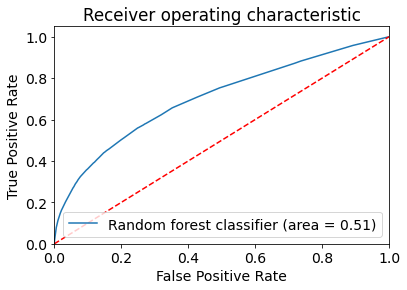

In [38]:
plt.rc("font", size=14)

RF_roc_auc = roc_auc_score(Y_valid, RF_predict)
fpr, tpr, thresholds = roc_curve(Y_valid, RF_probs)
plt.figure()
plt.plot(fpr, tpr, label='Random forest classifier (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

## XGBoost

In [39]:
import xgboost as xgb
"""{'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 10,
 'scale_pos_weight': 3}"""
xgb_model = xgb.XGBClassifier(random_state=123, gamma = 1, learning_rate=0.1, max_depth = 7, reg_lambda=10, scale_pos_weight=3)

# Fit
xgb_model.fit(X_train, Y_train)

# Predict
xgb_predict = xgb_model.predict(X_valid)
xgb_probs = xgb_model.predict_proba(X_valid)[:, 1]
xgb_predict_proba = RF_model.predict_proba(X_valid) 

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_valid, xgb_predict)
print(confusion_matrix)

[[76859  8075]
 [ 9714  5352]]


In [41]:
print(classification_report(Y_valid, xgb_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90     84934
         1.0       0.40      0.36      0.38     15066

    accuracy                           0.82    100000
   macro avg       0.64      0.63      0.64    100000
weighted avg       0.81      0.82      0.82    100000



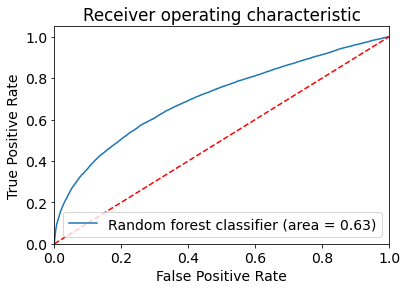

In [42]:
plt.rc("font", size=14)

xgb_roc_auc = roc_auc_score(Y_valid, xgb_predict)
fpr, tpr, thresholds = roc_curve(Y_valid, xgb_probs)
plt.figure()
plt.plot(fpr, tpr, label='Random forest classifier (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

In [43]:
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1]}
"""
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],"""


'\n    "reg_lambda": [0, 1, 10],\n    "scale_pos_weight": [1, 3, 5],\n    "subsample": [0.8],\n    "colsample_bytree": [0.5],'

In [44]:
"""from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
grid_cv.fit(X_train, Y_train)"""

'from sklearn.model_selection import GridSearchCV\n\n# Init classifier\nxgb_cl = xgb.XGBClassifier(objective="binary:logistic")\n\n# Init Grid Search\ngrid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")\n\n# Fit\ngrid_cv.fit(X_train, Y_train)'

In [45]:
"""grid_cv.best_score_"""

'grid_cv.best_score_'

### *Other models may also be helpful for this game*

Reference: https://scikit-learn.org/stable/supervised_learning.html
    

## Scoring New Data

### Prepare data for scoring

In [46]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='SCORE_RD2_NOCONTACT',
libref='cortex'
)

 ### Score new data based on your champion model
 
 Pick your champion model from previous steps and use it to predict next year donations. 
 
 In this case, the Decision Tree model performed better than the Logistic Regression model based on the AUC criterion.

### Predict 'probability of giving' for members who were contacted

In [47]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_contact = deal_with_nulls(scoring_data_contact, True)
scoring_data_contact = one_hot_encoding(scoring_data_contact, ['Education', 'City'])
scoring_data_contact = scalate(scoring_data_contact, numeric)

#scoring_data_contact.head()

X = scoring_data_contact[chosen] 
DT_predict_contact = DT_model.predict_proba(X)[:,1]
scoring_data_contact['Prediction_prob'] = DT_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction_prob']]
scoring_data_contact = scoring_data_contact.rename({'Prediction_prob': 'ProbContact'}, axis=1) 
scoring_data_contact.head()

,ID,ProbContact
0,2000001.0,0.236445
1,2000002.0,0.649368
2,2000003.0,0.649368
3,2000004.0,0.359097
4,2000005.0,0.649368


### Predict 'probability of giving' for members who were not contacted

In [48]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_nocontact = deal_with_nulls(scoring_data_nocontact, True)
scoring_data_nocontact = one_hot_encoding(scoring_data_nocontact, ['Education', 'City'])
scoring_data_nocontact = scalate(scoring_data_nocontact, numeric)

#scoring_data_contact.head()

X = scoring_data_nocontact[chosen] 
DT_predict_nocontact=DT_model.predict_proba(X)[:,1]
scoring_data_nocontact['Prediction_prob'] = DT_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction_prob']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction_prob': 'ProbNoContact'}, axis=1) 
scoring_data_nocontact.head()

,ID,ProbNoContact
0,2000001.0,0.142581
1,2000002.0,0.084130
2,2000003.0,0.061096
3,2000004.0,0.061096
4,2000005.0,0.061096


In [49]:
result_Prob = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Prob.sort_values(by=['ID'], inplace=True)
result_Prob.sample(10)

,ID,ProbContact,ProbNoContact
666601,2666602.0,0.183570,0.087262
981383,2981384.0,0.459615,0.402178
98875,2098876.0,0.183570,0.102733
431714,2431715.0,0.649368,0.074563
761005,2761006.0,0.253704,0.061096
89051,2089052.0,0.649368,0.087262
569229,2569230.0,0.508651,0.233410
309951,2309952.0,0.236445,0.087262
265150,2265151.0,0.395735,0.299060
155772,2155773.0,0.359097,0.293522


## Exporting Results to a CSV File

In [50]:
result_Prob.to_csv('Round2_Output_prob.csv', index=False)

In [51]:
!head Round2_Output_amt.csv

ID,AmtContact,AmtNoContact
2000001.0,59.90292125272901,75.39484930837777
2000002.0,54.94687679732393,51.3560942034364
2000003.0,102.0959273974884,63.792519259771865
2000004.0,40.2205108191173,31.605214096848815
2000005.0,107.20610317043486,69.05645289174822
2000006.0,37.049398284927044,28.212286659710426
2000007.0,30.64293417841352,45.624511257942444
2000008.0,58.981562187127444,63.07296369835893
2000009.0,43.53916230948834,39.72757634081598


In [52]:
import pandas as pd

probabilities = pd.read_csv("Round2_Output_prob.csv")
amounts = pd.read_csv("Round2_Output_amt.csv")

def Calc_Uplift(raw_data):
    return ((raw_data['AmtContact']*raw_data['ProbContact']) - (raw_data['AmtNoContact']*raw_data['ProbNoContact']))

raw_submission = pd.merge(probabilities, amounts, on=["ID"], how="right")
raw_submission["Uplift"] = raw_submission.apply(lambda row: Calc_Uplift(row), axis=1)

# Sorting data by descending Uplift value
raw_submission.sort_values(by=['Uplift'], ascending=False, inplace=True)


In [53]:
for num, raw in enumerate(raw_submission["Uplift"]):
  if raw < 25:
    break

print(num)

171764


In [54]:
NB = num - 1

In [55]:
raw_submission2 = raw_submission["ID"]

In [56]:
# Export the final csv file

submission = raw_submission2.head(NB)

#submission.to_csv('Round2 Output final3.csv', index=False)
submission.to_csv('Round2 Output finalTEST24.csv', index=False)


In [57]:
# Congratulations! You are now done with Round 2. You are ready to prepare your solution to upload it to the leaderboard.

In [58]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.

In [59]:
!head Round2\ Output\ finalTEST24.csv

ID
2211986.0
2277667.0
2388572.0
2328642.0
2699502.0
2396034.0
2723864.0
2551334.0
2002476.0
